<a href="https://colab.research.google.com/github/anshupandey/AI_Agents/blob/main/AAP_C9_Gemini_intro_Vertex_AI_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Vertex AI Embeddings - Text & Multimodal

## Overview

In this notebook, you will explore Vertex AI Embeddings API for both Text and Multimodal (Images and Video). Before we jump right into it, let's understand what are embeddings?


**Embeddings: Translating Content into the Language of Numbers**

Imagine you're trying to describe a friend's personality to someone else. You could use words like "kind," "energetic," or "thoughtful." But wouldn't it be cool if you could assign a set of numbers to each of these qualities to create a unique code for your friend?

Embeddings do something similar for various types of content:

* **For text:** Each word, sentence, or even an entire document gets transformed into a list of numbers (a vector). These numbers capture the meaning and relationships between words. For example, the word "cat" might be represented as [0.25, -0.18, 0.93...], while "kitten" could be [0.30, -0.16, 0.88...]. The close proximity of these vectors indicates a semantic connection.


* **For images:** Instead of pixels, an image becomes a vector that represents the visual features in the image. A picture of a sunny beach might get translated into [0.85, 0.42, -0.05...], while a snowy mountain might be [-0.32, 0.78, 0.12...].


* **For video:** Each frame or even the entire video sequence gets a numerical representation that encapsulates the visual content, movement, and potentially even audio information.


Let's take another example: Imagine you have a giant box of mismatched items: books, photographs, movie DVDs, and more. Each item is unique and complex, but you want to organize them in a way that makes sense. Embeddings do this, but for data like text, images, and videos.


Essentially, embeddings are like secret codes that represent your data in a simplified way. Think of them as numerical coordinates on a map. Similar items (like books on the same topic or photos of the same place) will be close to each other on this map, while very different items will be far apart.


**Why Do We Need Embeddings?**

Computers are great at crunching numbers, but they struggle to understand raw text, images, or videos. Embeddings act like a translator, converting these complex things into a format computers can easily work with. This opens up a world of possibilities for tasks like:


* **Finding Similarities:** By comparing the numbers in these vectors, you can easily determine how similar or different pieces of content are. Think of it as a way to measure the "distance" between meanings. This allows you to:

    - Find documents with related topics
    - Discover visually similar images
    - Group videos with similar content

* **Searching and Recommending:** Imagine you're looking for a specific image, but you don't have the right keywords to search for it. With embeddings, you can simply provide an example image, and the search engine can find other images that are similar in visual style or content.


* **Machine Learning and AI:** Embeddings are the backbone of many modern AI applications. They are used to train models that can understand and generate text, classify images, translate languages, and even create art.

nce trained with specific content like text, images, or any content, AI creates a space called "embedding space", which is essentially a map of the content's meaning.

![](https://storage.googleapis.com/github-repo/img/embeddings/textemb-vs-notebook/3.png)

AI can identify the location of each content on the map, that's what embedding is.

![](https://storage.googleapis.com/github-repo/img/embeddings/textemb-vs-notebook/4.png)

Let's take an example where a text discusses movies, music, and actors, with a distribution of 10%, 2%, and 30%, respectively. In this case, the AI can create an embedding with three values: 0.1, 0.02, and 0.3, in 3 dimensional space.

![](https://storage.googleapis.com/github-repo/img/embeddings/textemb-vs-notebook/5.png)

AI can put content with similar meanings closely together in the space.

AI and Embeddings are now playing a crucial role in creating a new way of human-computer interaction.

![](https://storage.googleapis.com/github-repo/img/embeddings/textemb-vs-notebook/6.png)

AI organizes data into embeddings, which represent what the user is looking for, the meaning of contents, or many other things you have in your business. This creates a new level of user experience that is becoming the new standard.

To learn more about embeddings, [Foundational courses: Embeddings on Google Machine Learning Crush Course](https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture) and [Meet AI's multitool: Vector embeddings by Dale Markowitz](https://cloud.google.com/blog/topics/developers-practitioners/meet-ais-multitool-vector-embeddings) are great materials.



### Objectives

In this notebook, you will explore:
* Vertex AI Text Embeddings API
* Vertex AI Multimodal Embeddings API (Images & Video)
* Building simple search with e-commerce data
    - Find product based on text query
    - Find product based on image
    - Find Video based on video


### Costs

This tutorial uses billable components of Google Cloud:

- Vertex AI

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.


## Getting Started


### Install Vertex AI SDK for Python and other dependencies


In [1]:
! pip3 install --upgrade --user google-cloud-aiplatform --quiet

### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [2]:
# Restart kernel after installs so that your environment can access the new packages
import IPython
import time

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>



### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment. This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).


In [1]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [2]:
# Define project information

import sys

PROJECT_ID = "jrproject-402905"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# if not running on Colab, try to get the PROJECT_ID automatically
if "google.colab" not in sys.modules:
    import subprocess

    PROJECT_ID = subprocess.check_output(
        ["gcloud", "config", "get-value", "project"], text=True
    ).strip()

print(f"Your project ID is: {PROJECT_ID}")

Your project ID is: jrproject-402905


In [3]:
import sys

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries


In [4]:
from base64 import b64encode
import os

import numpy as np
import pandas as pd
import PIL
import requests
from PIL import Image as PILImage  # Explicit import for clarity
from typing import Any, Dict, Iterable, List, Optional, Tuple, Union
import vertexai
from vertexai.language_models import TextEmbeddingInput, TextEmbeddingModel
from vertexai.vision_models import (
    Image as VMImage,
    MultiModalEmbeddingModel,
    MultiModalEmbeddingResponse,
    Video as VMVideo,
    VideoSegmentConfig,
)

pd.options.mode.chained_assignment = None  # default='warn'

### Load Vertex AI Text and Multimodal Embeddings


In [5]:
mm_embedding_model = MultiModalEmbeddingModel.from_pretrained("multimodalembedding")
text_embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@003")

## Basics of Vertex AI embeddings API

## Text Embedding

Text embeddings are a dense, often low-dimensional, vector representation of a piece of content such that, if two pieces of content are semantically similar, their respective embeddings are located near each other in the embedding vector space. This representation can be used to solve common NLP tasks, such as:

* **Semantic search**: Search text ranked by semantic similarity.
* **Recommendation**: Return items with text attributes similar to the given text.
* **Classification**: Return the class of items whose text attributes are similar to the given text.
* **Clustering**: Cluster items whose text attributes are similar to the given text.
* **Outlier Detection**: Return items where text attributes are least related to the given text.

Please refer to the [text embedding model documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/embeddings/get-text-embeddings) for more information.

In [6]:
def embed_text(
    texts: List[str] = ["banana muffins? ", "banana bread? banana muffins?"],
    model: str = text_embedding_model,
) -> List[List[float]]:
    """Embeds texts with a pre-trained, foundational model."""
    # model = TextEmbeddingModel.from_pretrained(model_name)
    inputs = [TextEmbeddingInput(text) for text in texts]
    embeddings = model.get_embeddings(inputs)
    return [embedding.values for embedding in embeddings]

In [7]:
tex_embedding = embed_text(texts=["What is life?"])
print("length of embedding: ", len(tex_embedding[0]))
print("First five vectors are: ", tex_embedding[0][:5])

length of embedding:  768
First five vectors are:  [0.00636137742549181, -0.03568779304623604, -0.008960321545600891, -0.018767524510622025, 0.0029407970141619444]


#### Embeddings and Pandas DataFrames

If your text is stored in a column of a DataFrame, you can create a new column with the embeddings with the example below.

In [8]:
import pandas as pd

text = [
    "i really enjoyed the movie last night",
    "so many amazing cinematic scenes yesterday",
    "had a great time writing my Python scripts a few days ago",
    "huge sense of relief when my .py script finally ran without error",
    "O Romeo, Romeo, wherefore art thou Romeo?",
]

df = pd.DataFrame(text, columns=["text"])
df

,text
0,i really enjoyed the movie last night
1,so many amazing cinematic scenes yesterday
2,had a great time writing my Python scripts a f...
3,huge sense of relief when my .py script finall...
4,"O Romeo, Romeo, wherefore art thou Romeo?"


Create a new column, `embeddings`, using the [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) function in pandas with the embeddings model.

In [9]:
df["embeddings"] = df.apply(lambda x: embed_text([x.text])[0], axis=1)
df

,text,embeddings
0,i really enjoyed the movie last night,"[-0.01591409742832184, 0.022704610601067543, -..."
1,so many amazing cinematic scenes yesterday,"[-0.012621072120964527, 0.0068139731884002686,..."
2,had a great time writing my Python scripts a f...,"[-0.018473712727427483, -0.0069047571159899235..."
3,huge sense of relief when my .py script finall...,"[0.003863031044602394, -0.03098081611096859, -..."
4,"O Romeo, Romeo, wherefore art thou Romeo?","[0.014724663458764553, -0.04504365846514702, -..."


#### Comparing similarity of text examples using cosine similarity

By converting text into embeddings, you can compute similarity scores. There are many ways to compute similarity scores, and one common technique is using [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity).

In the example from above, two of the sentences in the `text` column relate to enjoying a _movie_, and the other two relates to enjoying _coding_. Cosine similarity scores should be higher (closer to 1.0) when doing pairwise comparisons between semantically-related sentences, and scores should be lower between semantically-different sentences.

The DataFrame output below shows the resulting cosine similarity scores between the embeddings:

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_array = cosine_similarity(list(df.embeddings.values))

# display as DataFrame

df = pd.DataFrame(cos_sim_array, index=text, columns=text)
df

,i really enjoyed the movie last night,so many amazing cinematic scenes yesterday,had a great time writing my Python scripts a few days ago,huge sense of relief when my .py script finally ran without error,"O Romeo, Romeo, wherefore art thou Romeo?"
i really enjoyed the movie last night,1.000000,0.729769,0.695760,0.562088,0.526357
so many amazing cinematic scenes yesterday,0.729769,1.000000,0.639297,0.573032,0.511450
had a great time writing my Python scripts a few days ago,0.695760,0.639297,1.000000,0.769378,0.454656
huge sense of relief when my .py script finally ran without error,0.562088,0.573032,0.769378,1.000000,0.446793
"O Romeo, Romeo, wherefore art thou Romeo?",0.526357,0.511450,0.454656,0.446793,1.000000


To make this easier to understand, you can use a heatmap. Naturally, text is most similar when they are identical (score of 1.0). The next highest scores are when sentences are semantically similar. The lowest scores are when sentences are quite different in meaning.

[Text(0.5, 1, 'i really enjoyed the movie last night'),
 Text(1.5, 1, 'so many amazing cinematic scenes yesterday'),
 Text(2.5, 1, 'had a great time writing my Python scripts a few days ago'),
 Text(3.5, 1, 'huge sense of relief when my .py script finally ran without error'),
 Text(4.5, 1, 'O Romeo, Romeo, wherefore art thou Romeo?')]

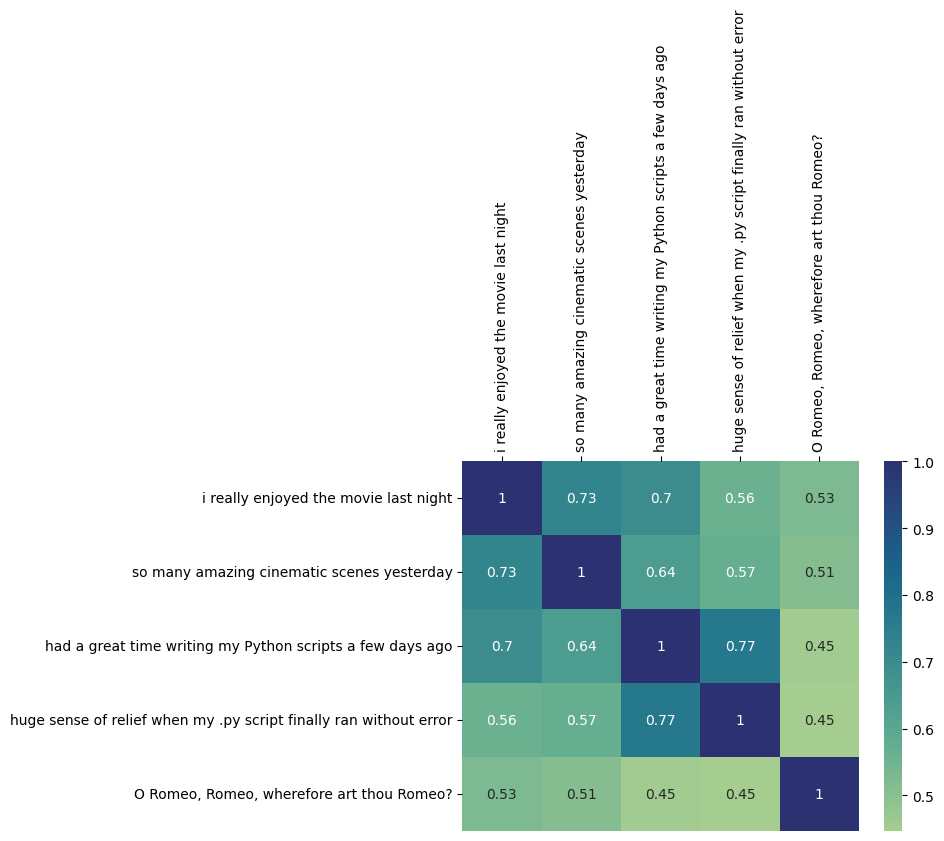

In [11]:
import seaborn as sns

ax = sns.heatmap(df, annot=True, cmap="crest")
ax.xaxis.tick_top()
ax.set_xticklabels(text, rotation=90)

## Multimodal Embedding API

The [multimodal embeddings](https://cloud.google.com/vertex-ai/generative-ai/docs/embeddings/get-multimodal-embeddings) model generates [ 128, 256, 512, and 1408 (default) ] -dimension vectors based on the input you provide, which can include a combination of image, text, and video data. The embedding vectors can then be used for subsequent tasks like image classification or video content moderation.

The image embedding vector and text embedding vector are in the same semantic space with the same dimensionality. Consequently, these vectors can be used interchangeably for use cases like searching image by text, or searching video by image.

For text-only embedding use cases, we recommend using the Vertex AI text-embeddings API instead demonstrate above.

**Use cases**

**Image and text:**


* Image classification: Takes an image as input and predicts one or more classes (labels).
* Image search: Search relevant or similar images.
* Recommendations: Generate product or ad recommendations based on images.



**Image, text, and video:**

* Recommendations: Generate product or advertisement recommendations based on videos (similarity search).
* Video content search
    * Using semantic search: Take a text as an input, and return a set of ranked frames matching the query.
* Using similarity search:
    * Take a video as an input, and return a set of videos matching the query.
    * Take an image as an input, and return a set of videos matching the query.
* Video classification: Takes a video as input and predicts one or more classes.


In [16]:
def get_image_video_text_embeddings(
    image_path: Optional[str] = None,
    video_path: Optional[str] = None,
    contextual_text: Optional[str] = None,
    dimension: Optional[int] = None,
    video_segment_config: Optional[VideoSegmentConfig] = None,
    debug: bool = False,
) -> MultiModalEmbeddingResponse:
    """Generates multimodal embeddings from image, video, and text.

    Args:
        image_path: Path to image (local or Google Cloud Storage).
        video_path: Path to video (local or Google Cloud Storage).
        contextual_text: Text to generate embeddings for. Max: 32 tokens (~32 words).
        dimension: Dimension of the returned embeddings (128, 256, 512, or 1408).
        video_segment_config: Defines specific video segments for embedding generation.
        debug: If True, print debugging information.

    Returns:
        MultiModalEmbeddingResponse: The generated embeddings.

    Raises:
        ValueError: If neither image_path, video_path, nor contextual_text is provided.
    """

    # Input validation
    if not any([image_path, video_path, contextual_text]):
        raise ValueError(
            "At least one of image_path, video_path, or contextual_text must be provided."
        )

    image = VMImage.load_from_file(image_path) if image_path else None
    video = VMVideo.load_from_file(video_path) if video_path else None

    embeddings = mm_embedding_model.get_embeddings(
        image=image,
        video=video,
        video_segment_config=video_segment_config,
        contextual_text=contextual_text,
        dimension=dimension,
    )

    # Prepare result dictionary for better organization
    result = {}

    if image_path:
        if debug:
            print(
                f"\n\nImage Embedding (first five):\n{embeddings.image_embedding[:5]}"
            )
            print(f"Dimension of Image Embedding: {len(embeddings.image_embedding)}")
        result["image_embedding"] = embeddings.image_embedding

    if video_path:
        if debug:
            print("Video Embeddings:")
        video_embedding_list = [
            {
                "start_offset_sec": video_embedding.start_offset_sec,
                "end_offset_sec": video_embedding.end_offset_sec,
                "embedding": video_embedding.embedding,
            }
            for video_embedding in embeddings.video_embeddings
        ]
        result["video_embeddings"] = video_embedding_list

        if debug:
            for embedding in video_embedding_list:
                print(
                    f"\nVideo Segment (in seconds): {embedding['start_offset_sec']} - {embedding['end_offset_sec']}"
                )
                print(f"Embedding (first five): {embedding['embedding'][:5]}")
                print(f"Dimension of Video Embedding: {len(embedding['embedding'])}")

    if contextual_text:
        if debug:
            print(f"\n\nText Embedding (first five):\n{embeddings.text_embedding[:5]}")
            print(f"Dimension of Text Embedding: {len(embeddings.text_embedding)}")
        result["text_embedding"] = embeddings.text_embedding

    return result

In [17]:
# Image embeddings with default 1408 dimension
result = get_image_video_text_embeddings(
    image_path="gs://github-repo/embeddings/getting_started_embeddings/gms_images/GGOEACBA104999.jpg",
    debug=True,
    dimension=1408,
)



Image Embedding (first five):
[-0.000501200848, 0.0334769525, -0.0165630654, 0.0210420564, -0.00548546249]
Dimension of Image Embedding: 1408


In [18]:
# Image embeddings with 256 dimension each
result = get_image_video_text_embeddings(
    image_path="gs://github-repo/embeddings/getting_started_embeddings/gms_images/GGOEAFKA194799.jpg",
    dimension=256,  # Available values: 128, 256, 512, and 1408 (default)
    debug=True,
)  # printing first 10 vectors only



Image Embedding (first five):
[0.247905046, -0.0226784535, 0.0741965771, -0.0817744136, 0.0027668064]
Dimension of Image Embedding: 256


In [19]:
# Video embeddings with 1408 dimension # Video embedding only supports 1408
result = get_image_video_text_embeddings(
    video_path="gs://github-repo/embeddings/getting_started_embeddings/UCF-101-subset/BrushingTeeth/v_BrushingTeeth_g01_c02.mp4",
    debug=True,
)

Video Embeddings:

Video Segment (in seconds): 0.0 - 4.0
Embedding (first five): [-0.0114297783, 0.0216636062, -0.00484446669, -0.0174837373, -0.0042092572]
Dimension of Video Embedding: 1408


In [21]:
# Video embeddings with 1408 dimension and Video Segment. # Video embedding only supports 1408
result = get_image_video_text_embeddings(
    video_path="gs://github-repo/embeddings/getting_started_embeddings/UCF-101-subset/BrushingTeeth/v_BrushingTeeth_g01_c02.mp4",
    video_segment_config=VideoSegmentConfig(
        start_offset_sec=0, end_offset_sec=120, interval_sec=60
    ),
    debug=True,
)  # printing first 10 vectors only

Video Embeddings:

Video Segment (in seconds): 0.0 - 4.0
Embedding (first five): [-0.0114297699, 0.0216636304, -0.00484452536, -0.0174836554, -0.0042092572]
Dimension of Video Embedding: 1408


## Use-case: Building simple search with embeddings

### Build embeddings for data from scratch

#### Video Embeddings

In [22]:
data_url = "https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/video_data_without_embeddings.csv"
video_data_without_embeddings = pd.read_csv(data_url)
video_data_without_embeddings.head()

,gcs_path,category,file_name
0,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g25_c04.mp4
1,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g25_c03.mp4
2,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g13_c03.mp4
3,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g21_c04.mp4
4,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g07_c02.mp4


In [23]:
video_data_without_embeddings.shape

(50, 3)

In [27]:
#%%time ~3 min
video_data_without_embeddings = pd.read_csv(data_url)
# Create new dataframe to store embeddings
video_data_with_embeddings = video_data_without_embeddings.copy()

import time
def get_vid_em(x):
  time.sleep(40)
  return get_image_video_text_embeddings(video_path=x)['video_embeddings'][0]['embedding']

# Get Video Embeddings
video_data_with_embeddings["video_embeddings"] = (
    video_data_without_embeddings["gcs_path"]
    .apply(get_vid_em)
 )

video_data_with_embeddings.head()

KeyboardInterrupt: 

#### Image and Text Embeddings

In [28]:
data_url = "https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/image_data_without_embeddings.csv"
image_data_without_embeddings = pd.read_csv(data_url)
image_data_without_embeddings.head()

,parent_sku,parent_description,retail_price,img_url,seo_url,title,shortdesc,longdesc,keywords,metadescription,file_path,gcs_path
0,GGOEAXXX1947,Android Keyboard Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Android Keyboard Sticker,Add some character to your keyboard! This sma...,"<div><p dir=""ltr""><span>Sticker measures ½ x ...",Android Keyboard Sticker,Shop Google Merchandise store for Android Keyb...,/content/data/gms_images/GGOEAFKA194799.jpg,gs://github-repo/embeddings/getting_started_em...
1,GGOEGXXX1238,Google Pen Neon Coral,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Pen Neon Coral,Whether you are signing official documents or ...,<div><p>Soft touch surface.</p><p>Fine point g...,"Google Pen Neon Coral, Google, pen, orange, co...",Shop Google Merchandise Store for Google Pen N...,/content/data/gms_images/GGOEGOAN123899.jpg,gs://github-repo/embeddings/getting_started_em...
2,GGOEGXXX1983,Google Hologram Sunnyvale Campus Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Hologram Sunnyvale Campus Sticker,"Nostalgic and fun for everyone, our exclusive ...","<div><p dir=""ltr""><span>Sticker measures 3 H</...",Google Hologram Sunnyvale Campus Sticker,Shop Google Merchandise store for Google Holog...,/content/data/gms_images/GGOEGCKA198399.jpg,gs://github-repo/embeddings/getting_started_em...
3,GGOEGXXX1773,Google Maps Wheat Pen,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Maps Wheat Pen,Drop your pen to paper and start planning your...,<div><p>Black Ink </p><p>Retractable medium ba...,Google Maps Wheat Pen,Shop Google Merchandise Store for Google Maps ...,/content/data/gms_images/GGOEGOAB177399.jpg,gs://github-repo/embeddings/getting_started_em...
4,GGOECXXX1946,Google Cloud Keyboard Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Cloud Keyboard Sticker,Add some character to your keyboard! This sma...,"<div><p dir=""ltr""><span>Sticker measures ½ x ...",Google Cloud Keyboard Sticker,Shop Google Merchandise store for Google Cloud...,/content/data/gms_images/GGOECFKA194699.jpg,gs://github-repo/embeddings/getting_started_em...


In [ ]:
# %%time ~5min

# # Create new dataframe to store embeddings
# image_data_with_embeddings = image_data_without_embeddings.copy()

# # Combining all the text metadata in a single column.
# image_data_with_embeddings["combined_text"] = (
#     image_data_with_embeddings["title"].fillna("")
#     + " "
#     + image_data_with_embeddings["keywords"].fillna("")
#     + " "
#     + image_data_with_embeddings["metadescription"].fillna("")
# )

# # Get Image and Text Embeddings

# # Taking default 1408 dimension
# image_data_with_embeddings["image_embeddings"] = image_data_with_embeddings[
#     "gcs_path"
# ].apply(lambda x: get_image_video_text_embeddings(image_path=x)["image_embedding"])
# # Taking default 768 dimension
# image_data_with_embeddings["text_embeddings"] = image_data_with_embeddings[
#     "combined_text"
# ].apply(lambda x: embed_text([x])[0])

# image_data_with_embeddings.head()

## Load pre-computed embeddings

In [29]:
# Comment this cell, if you are computing embeddings from scratch.

image_data_with_embeddings = pd.read_csv(
    "https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/image_data_with_embeddings.csv"
)  # dimensions; image = 1408, text = 768
video_data_with_embeddings = pd.read_csv(
    "https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/video_data_with_embeddings.csv"
)  # dimensions; video = 1408

In [30]:
image_data_with_embeddings.head()

,parent_sku,parent_description,retail_price,img_url,seo_url,title,shortdesc,longdesc,keywords,metadescription,file_path,gcs_path,combined_text,image_embeddings,text_embeddings
0,GGOEAXXX1947,Android Keyboard Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Android Keyboard Sticker,Add some character to your keyboard! This sma...,"<div><p dir=""ltr""><span>Sticker measures ½ x ...",Android Keyboard Sticker,Shop Google Merchandise store for Android Keyb...,/content/data/gms_images/GGOEAFKA194799.jpg,gs://github-repo/embeddings/getting_started_em...,Android Keyboard Sticker Android Keyboard Stic...,"[-0.019712951, -0.00683932705, 0.0385046713, 0...","[-0.0003441123408265412, -0.020794985815882683..."
1,GGOEGXXX1238,Google Pen Neon Coral,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Pen Neon Coral,Whether you are signing official documents or ...,<div><p>Soft touch surface.</p><p>Fine point g...,"Google Pen Neon Coral, Google, pen, orange, co...",Shop Google Merchandise Store for Google Pen N...,/content/data/gms_images/GGOEGOAN123899.jpg,gs://github-repo/embeddings/getting_started_em...,"Google Pen Neon Coral Google Pen Neon Coral, G...","[0.0312964357, 0.0266801305, -0.00428772392, 0...","[0.015119598247110844, -0.05192413181066513, -..."
2,GGOEGXXX1983,Google Hologram Sunnyvale Campus Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Hologram Sunnyvale Campus Sticker,"Nostalgic and fun for everyone, our exclusive ...","<div><p dir=""ltr""><span>Sticker measures 3 H</...",Google Hologram Sunnyvale Campus Sticker,Shop Google Merchandise store for Google Holog...,/content/data/gms_images/GGOEGCKA198399.jpg,gs://github-repo/embeddings/getting_started_em...,Google Hologram Sunnyvale Campus Sticker Googl...,"[-0.0115588326, 0.0233894847, 0.0509909727, 0....","[0.008340244181454182, -0.019928857684135437, ..."
3,GGOEGXXX1773,Google Maps Wheat Pen,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Maps Wheat Pen,Drop your pen to paper and start planning your...,<div><p>Black Ink </p><p>Retractable medium ba...,Google Maps Wheat Pen,Shop Google Merchandise Store for Google Maps ...,/content/data/gms_images/GGOEGOAB177399.jpg,gs://github-repo/embeddings/getting_started_em...,Google Maps Wheat Pen Google Maps Wheat Pen Sh...,"[0.0108120618, 0.0177407321, -0.0159502737, 0....","[0.0009172282880172133, -0.05302327498793602, ..."
4,GGOECXXX1946,Google Cloud Keyboard Sticker,2.0,https://shop.googlemerchandisestore.com/store/...,https://shop.googlemerchandisestore.com/Google...,Google Cloud Keyboard Sticker,Add some character to your keyboard! This sma...,"<div><p dir=""ltr""><span>Sticker measures ½ x ...",Google Cloud Keyboard Sticker,Shop Google Merchandise store for Google Cloud...,/content/data/gms_images/GGOECFKA194699.jpg,gs://github-repo/embeddings/getting_started_em...,Google Cloud Keyboard Sticker Google Cloud Key...,"[-0.0243009, 0.0230779219, 0.039797049, 0.0337...","[0.015464423224329948, -0.025598861277103424, ..."


In [31]:
video_data_with_embeddings.head()

,Unnamed: 0,gcs_path,category,file_name,video_embeddings
0,0,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g25_c04.mp4,"[0.0212469846, 0.021904517, 0.00673244661, 0.0..."
1,1,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g25_c03.mp4,"[0.0150156552, 0.0182044469, 0.00531015405, 0...."
2,2,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g13_c03.mp4,"[0.0176973231, 0.0306478031, 0.0060283, 0.0190..."
3,3,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g21_c04.mp4,"[0.00879747886, 0.00810849108, -0.00468777, 0...."
4,4,gs://github-repo/embeddings/getting_started_em...,TaiChi,v_TaiChi_g07_c02.mp4,"[0.0203397758, -0.000400501624, 0.00930729136,..."


## Use-case - Images & text

### Find product based on text search query

In [32]:
from IPython.display import Image as ImageByte, display


def get_url_from_gcs(gcs_uri: str) -> str:
    """Converts a Google Cloud Storage (GCS) URI to a publicly accessible URL.

    Args:
        gcs_uri: The GCS URI in the format gs://bucket-name/object-name.

    Returns:
        The corresponding public URL for the object.
    """
    return gcs_uri.replace("gs://", "https://storage.googleapis.com/").replace(
        " ", "%20"
    )


def print_shortlisted_products(
    shortlisted_products: Union[Dict, Any], display_flag: bool = False
) -> None:
    """Prints information about shortlisted products, optionally displaying images.

    Args:
        shortlisted_products: A dictionary-like object containing product data with 'score' and 'gcs_path' keys.
        display_flag: If True, displays images of the products using IPython.
    """
    print("Similar product identified ---- \n")

    for (
        index,
        product,
    ) in shortlisted_products.iterrows():  # Iterate directly over rows for clarity
        score = product["score"]
        gcs_path = product["gcs_path"]
        url = get_url_from_gcs(gcs_path)

        print(f"Product {index + 1}: Confidence Score: {score}")
        print(url)

        if display_flag:
            display(ImageByte(url=url))  # Simplified image display
            print()  # Add an empty line for visual separation

**Cosine Similarity: A Measure of Orientation, Not Magnitude**

Cosine similarity is a mathematical tool to gauge the similarity between two vectors (like points in space). Think of vectors as arrows:
* **Direction:** Each vector points in a particular direction.
* **Length:** Each vector has a certain length (magnitude).


Cosine similarity focuses on the angle between two vectors, ignoring their lengths. If two vectors point in almost the same direction, they are considered highly similar (cosine similarity close to 1). If they're at a right angle, they're completely dissimilar (cosine similarity of 0). Opposite directions give a similarity of -1.

Read more about [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity)

**Embeddings: Transforming Data into Vectors**

In machine learning, an embedding is a way to represent complex data (like text, images, or videos) as vectors. This allows us to apply mathematical operations like cosine similarity. For example:

* **Word Embeddings:** Words with similar meanings have vectors that point in similar directions.
* **Image Embeddings:** Images with similar content (e.g., two pictures of cats) have vectors with a small angle between them.
* **Video Embeddings:** Videos of the same event or with similar themes have similar vector representations.


**Other Distance Metrics for Vectors**

While cosine similarity is popular, it's not the only way to measure distance between vectors. Here are a few others:

* **Euclidean Distance:** The straight-line distance between two points. Sensitive to differences in magnitude.
* **Manhattan Distance:** The distance between two points if you can only move along a grid (like city blocks).
* **Hamming Distance:** The number of positions at which two vectors differ (often used for binary data).

**Choosing the Right Distance Metric**
The best distance metric depends on your specific application. Cosine similarity is often preferred when you care more about the relationship between items (e.g., meaning of words, content of images) rather than their absolute magnitude.


In [33]:
search_query = "I am looking for something related to dinosaurs theme"

In [35]:
# Steps to get similar products

# Step 1 - Convert 'search_query' to embeddings
search_query_embedding = embed_text([search_query])[0]

# Step 2 - Find cosine similarity (or simply np.dot) of search_query_embedding and image_data_with_embeddings['text_embeddings']
cosine_scores = image_data_with_embeddings["text_embeddings"].apply(
    lambda x: round(np.dot(eval(x), search_query_embedding), 2)
)  # eval is used to convert string of list to list

# Step 3 - Sort the cosine score and pick the top 3 results
top_3_indices = cosine_scores.nlargest(3).index.tolist()
top_n_cosine_values = cosine_scores.nlargest(3).values.tolist()

# Step 4 - Filter image_data_with_embeddings with the shortlisted index and add score
shortlisted_products = image_data_with_embeddings.iloc[top_3_indices]
shortlisted_products.loc[:, "score"] = top_n_cosine_values

# Step 5 - Display the shortlisted products
print_shortlisted_products(
    shortlisted_products, display_flag=True
)  # pass display_flag=True to display the images

Similar product identified ---- 

Product 29: Confidence Score: 0.73
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGCKA176099.jpg



Product 16: Confidence Score: 0.7
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGFKA194899.jpg



Product 85: Confidence Score: 0.7
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGCBA195199.jpg


In [36]:
def get_similar_products_from_text_query(
    search_query: str,
    top_n: int = 3,
    threshold: float = 0.6,
    embeddings_data: pd.DataFrame = image_data_with_embeddings,
) -> Optional[pd.DataFrame]:
    """
    Retrieves the most similar products to a given text query based on embeddings.

    Args:
        search_query: The text query to find similar products for.
        top_n: The maximum number of similar products to return.
        threshold: The minimum cosine similarity score for a product to be considered similar.
        embeddings_data: A DataFrame containing text embeddings for products (assumes a column named 'text_embeddings').

    Returns:
        A DataFrame with the top_n similar products and their scores, or None if none meet the threshold.
    """

    # Step 1: Embed the search query
    search_query_embedding = embed_text([search_query])[
        0
    ]  # Assuming 'embed_text' is a function you have

    # Step 2: Calculate cosine similarities (optimize by avoiding apply and eval)
    cosine_scores = image_data_with_embeddings["text_embeddings"].apply(
        lambda x: round(np.dot(eval(x), search_query_embedding), 2)
    )

    # Step 3: Filter and sort scores
    scores_above_threshold = cosine_scores[cosine_scores >= threshold]
    top_n_indices = scores_above_threshold.nlargest(top_n).index.tolist()

    # Step 4: Handle cases with insufficient scores
    if len(top_n_indices) < top_n:
        print(f"Warning: Only {len(top_n_indices)} scores meet the threshold.")

    # Step 5: Get shortlisted products with scores (optimize by direct assignment)
    if top_n_indices:
        shortlisted_products = embeddings_data.iloc[top_n_indices].copy()
        shortlisted_products["score"] = scores_above_threshold.nlargest(
            top_n
        ).values.tolist()
    else:
        print("No scores meet the threshold. Consider lowering the threshold.")
        shortlisted_products = None

    return shortlisted_products

In [38]:
search_query = "Do you have socks in checkered patterns?"

shortlisted_products = get_similar_products_from_text_query(
    search_query, top_n=3, threshold=0.7
)

print_shortlisted_products(shortlisted_products, display_flag=True)

Similar product identified ---- 

Product 129: Confidence Score: 0.76
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGAXA123510.jpg



Product 133: Confidence Score: 0.76
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOECAXA190210.jpg



Product 136: Confidence Score: 0.75
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGAXA170310.jpg


In [39]:
search_query = "I am looking for sweatshirt with google logo and probably should be in embroidered pattern"

shortlisted_products = get_similar_products_from_text_query(
    search_query, top_n=3, threshold=0.6
)

print_shortlisted_products(shortlisted_products, display_flag=True)

Similar product identified ---- 

Product 330: Confidence Score: 0.81
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEYXXX1734.jpg



Product 339: Confidence Score: 0.8
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGXXX1737.jpg



Product 264: Confidence Score: 0.79
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGXXX1736.jpg


### Find Similar product based on images (selected product)

In [41]:
random_index = 130
liked_product = image_data_with_embeddings["gcs_path"][random_index]
print("Liked Product ---")


print(get_url_from_gcs(liked_product))

# to display the image
display(ImageByte(url=get_url_from_gcs(liked_product)))

Liked Product ---
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGHPL206210.jpg


In [43]:
# Steps to get similar products

# Step 1 - Convert 'liked_product' to embeddings
liked_product_embedding = get_image_video_text_embeddings(image_path=liked_product)[
    "image_embedding"
]

# Step 2 - Find cosine similarity (or simply np.dot) of liked_product_embedding and image_data_with_embeddings['image_embeddings']
cosine_scores = image_data_with_embeddings["image_embeddings"].apply(
    lambda x: round(np.dot(eval(x), liked_product_embedding), 2)
)  # eval is used to convert string of list to list


# Step 3 - Sort the cosine score, filter with threshold (matching should be less than 1.0 and greater than high value) and pick the top 2 results
threshold = 0.6
scores_above_threshold = cosine_scores[
    (cosine_scores >= threshold) & (cosine_scores < 1.00)
]
top_2_indices = scores_above_threshold.nlargest(2).index.tolist()
top_2_cosine_values = scores_above_threshold.nlargest(2).values.tolist()

# Step 4 - Filter image_data_with_embeddings with the shortlisted index
shortlisted_products = image_data_with_embeddings.iloc[top_2_indices]
shortlisted_products.loc[:, "score"] = top_2_cosine_values

# Step 5 - Display the shortlisted product.
print_shortlisted_products(shortlisted_products, display_flag=True)

Similar product identified ---- 

Product 138: Confidence Score: 0.89
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGHPB175510.jpg



Product 141: Confidence Score: 0.86
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGHPR175610.jpg


In [44]:
def get_similar_products_from_image_query(
    liked_product: Union[str, np.ndarray], top_n: int = 3, threshold: float = 0.6
) -> Optional[pd.DataFrame]:
    """
    Retrieves similar products based on an image query.

    This function takes an image path or embedding of a "liked" product, compares it to
    a dataset of product embeddings, and returns the top N most similar products
    that exceed a specified similarity threshold.

    Args:
        liked_product: Path to the image file of the liked product or its embedding.
        top_n: The maximum number of similar products to return.
        threshold: The minimum cosine similarity score for a product to be considered similar.

    Returns:
        A pandas DataFrame containing the top N similar products and their scores,
        or None if no products meet the threshold.
    """

    # Step 1: Ensure the `liked_product` is an embedding
    if isinstance(liked_product, str):
        liked_product_embedding = get_image_video_text_embeddings(
            image_path=liked_product
        )["image_embedding"]
    else:
        liked_product_embedding = liked_product

    # Step 2: Calculate cosine similarities
    # Convert embeddings to numpy arrays for efficient calculation if necessary
    if isinstance(image_data_with_embeddings["image_embeddings"].iloc[0], str):
        image_data_with_embeddings["image_embeddings"] = image_data_with_embeddings[
            "image_embeddings"
        ].apply(eval)
    cosine_scores = image_data_with_embeddings["image_embeddings"].apply(
        lambda x: np.dot(x, liked_product_embedding)
    )

    # Step 3: Filter and select top scores
    scores_above_threshold = cosine_scores[
        (cosine_scores >= threshold) & (cosine_scores < 1.0)
    ]
    top_n_indices = scores_above_threshold.nlargest(top_n).index.tolist()
    top_n_cosine_values = scores_above_threshold.nlargest(top_n).values.tolist()

    # Step 4: Log insufficient scores (optional)
    if len(top_n_indices) < top_n:
        print(f"Warning: Only {len(top_n_indices)} scores meet the threshold.")

    # Step 5: Return results if scores are available
    if top_n_indices:
        shortlisted_products = image_data_with_embeddings.iloc[top_n_indices].copy()
        shortlisted_products["score"] = top_n_cosine_values
        return shortlisted_products

    else:
        print("No scores meet the threshold. Consider lowering the threshold.")
        return None

In [45]:
random_index = 9
liked_product = image_data_with_embeddings["gcs_path"][random_index]
print("Liked Product ---")
print(get_url_from_gcs(liked_product))

# to display the image
display(ImageByte(url=get_url_from_gcs(liked_product)))

Liked Product ---
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGOAQ101299.jpg


In [46]:
# get recommendation for the liked product (image)
shortlisted_products = get_similar_products_from_image_query(
    liked_product, top_n=3, threshold=0.6
)

print_shortlisted_products(shortlisted_products, display_flag=True)

Similar product identified ---- 

Product 10: Confidence Score: 0.9999998576368267
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGOAQ101299.jpg



Product 7: Confidence Score: 0.9079879767532153
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGOAR124299.jpg



Product 22: Confidence Score: 0.9001528832037331
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGOAH124099.jpg


In [47]:
random_index = 120
liked_product = image_data_with_embeddings["gcs_path"][random_index]
print("Liked Product ---")

print(get_url_from_gcs(liked_product))

# to display the image
display(ImageByte(url=get_url_from_gcs(liked_product)))

Liked Product ---
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGCBA169799.jpg


In [48]:
# get recommendation for the liked product (image)
shortlisted_products = get_similar_products_from_image_query(
    liked_product, top_n=3, threshold=0.6
)

print_shortlisted_products(shortlisted_products,display_flag=True)

Similar product identified ---- 

Product 116: Confidence Score: 0.8111985062382786
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGCBA169699.jpg



Product 124: Confidence Score: 0.7990487432602491
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGCBA169899.jpg



Product 125: Confidence Score: 0.7960892919925919
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/gms_images/GGOEGCBA169299.jpg


### Find Similar videos

In [49]:
def display_video_gcs(
    gcs_uri: Optional[str] = None, public_gcs_url: Optional[str] = None
) -> None:
    """Displays a video hosted on Google Cloud Storage (GCS) in a Jupyter Notebook.

    Args:
        gcs_uri: The GCS URI of the video.
        public_gcs_url: The public URL of the video, if available. If not provided and
            `gcs_uri` is given, the function will attempt to generate the public URL.

    Raises:
        ValueError: If neither `gcs_uri` nor `public_gcs_url` is provided.
    """
    if not gcs_uri and not public_gcs_url:
        raise ValueError("Either gcs_uri or public_gcs_url must be provided.")

    if gcs_uri and not public_gcs_url:
        public_gcs_url = get_url_from_gcs(
            gcs_uri
        )  # Assuming you have a helper function for this

    html_code = f"""
    <video width="640" height="480" controls>
        <source src="{public_gcs_url}" type="video/mp4">
        Your browser does not support the video tag.
    </video>
    """
    display(HTML(html_code))


def print_shortlisted_video(
    shortlisted_videos: List[Dict], display_flag: bool = False
) -> None:
    """Prints information about shortlisted videos and optionally displays them.

    Args:
        shortlisted_videos: A list of dictionaries where each dictionary represents a video
            with keys 'score' (float) and 'gcs_path' (str).
        display_flag: If True, displays each video in the notebook.
    """
    print("Similar videos identified ---- \n")

    for i in range(len(shortlisted_videos)):
        print(f"Video {i+1}: Confidence Score: {shortlisted_products['score'].iloc[i]}")

        url = get_url_from_gcs(shortlisted_videos["gcs_path"].values[i])
        print(url)
        if display_flag:
            display_video_gcs(public_gcs_url=url)
            # IPython.display.display(load_image_from_url(url))
            print()  # Add an empty line for visual separation

In [51]:
from IPython.display import HTML

random_index = 10
liked_video = video_data_with_embeddings["gcs_path"][random_index]
public_gcs_url = get_url_from_gcs(video_data_with_embeddings["gcs_path"][1])

print(public_gcs_url)
display_video_gcs(public_gcs_url=public_gcs_url)

https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/UCF-101-subset/TaiChi/v_TaiChi_g25_c03.mp4


In [52]:
# Steps to get similar video

# Step 1 - Convert 'liked_video' to embeddings
liked_video_embedding = get_image_video_text_embeddings(video_path=liked_video)[
    "video_embeddings"
][0]["embedding"]


# Step 2 - Find cosine similarity (or simply np.dot) of liked_video_embedding and video_data_with_embeddings['video_embeddings']
cosine_scores = video_data_with_embeddings["video_embeddings"].apply(
    lambda x: round(np.dot(eval(x), liked_video_embedding), 2)
)  # eval is used to convert string of list to list


# Step 3 - Sort the cosine score, filter with threshold (matching should be less than 1.0 and greater than high value) and pick the top 2 results
threshold = 0.6
scores_above_threshold = cosine_scores[
    (cosine_scores >= threshold) & (cosine_scores < 1.00)
]
top_2_indices = scores_above_threshold.nlargest(2).index.tolist()
top_2_cosine_values = scores_above_threshold.nlargest(2).values.tolist()

# Step 4 - Filter video_data_with_embeddings with the shortlisted index
shortlisted_videos = video_data_with_embeddings.iloc[top_2_indices]
shortlisted_videos.loc[:, "score"] = top_2_cosine_values

# Step 5 - Display the shortlisted video.
print_shortlisted_video(shortlisted_videos, display_flag=True)  # display_flag=True

Similar videos identified ---- 

Video 1: Confidence Score: 0.8111985062382786
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/UCF-101-subset/PlayingViolin/v_PlayingViolin_g13_c01.mp4



Video 2: Confidence Score: 0.7990487432602491
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/UCF-101-subset/PlayingViolin/v_PlayingViolin_g06_c02.mp4


In [53]:
def get_similar_videos_from_video_query(
    liked_video: str, top_n: int = 3, threshold: float = 0.6
) -> pd.DataFrame:
    """
    Retrieves similar videos to a given 'liked_video' using embeddings and cosine similarity.

    Args:
        liked_video: The path to the video to find similar videos for.
        top_n: The maximum number of similar videos to return.
        threshold: The minimum cosine similarity score for a video to be considered similar.

    Returns:
        A pandas DataFrame containing the shortlisted videos with their similarity scores.
    """

    # Step 1: Get the embeddings for the 'liked_video'
    liked_video_embeddings = get_image_video_text_embeddings(video_path=liked_video)[
        "video_embeddings"
    ][0]["embedding"]

    # Ensure video_data_with_embeddings is available (you might need to load or define it)
    if "video_data_with_embeddings" not in globals():
        raise ValueError("video_data_with_embeddings DataFrame is not defined.")

    # Step 2: Calculate cosine similarities with pre-loaded video embeddings
    cosine_scores = video_data_with_embeddings["video_embeddings"].apply(
        lambda x: round(
            np.dot(eval(x), liked_video_embeddings), 2
        )  # Safely convert embeddings to arrays
    )

    # Step 3: Filter and sort based on threshold and top_n
    scores_above_threshold = cosine_scores[
        (cosine_scores >= threshold) & (cosine_scores < 1.00)
    ]
    top_indices = scores_above_threshold.nlargest(top_n).index.tolist()
    top_cosine_values = scores_above_threshold.nlargest(top_n).values.tolist()

    # Step 4: Get the shortlisted videos with scores
    shortlisted_videos = video_data_with_embeddings.iloc[top_indices].copy()
    shortlisted_videos["score"] = top_cosine_values

    return shortlisted_videos

In [58]:
random_index = 10
liked_video = video_data_with_embeddings["gcs_path"][random_index]
public_gcs_url = get_url_from_gcs(video_data_with_embeddings["gcs_path"][random_index])

print(public_gcs_url)
display_video_gcs(public_gcs_url=public_gcs_url)

https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/UCF-101-subset/PlayingViolin/v_PlayingViolin_g13_c03.mp4


In [59]:
shortlisted_videos = get_similar_videos_from_video_query(
    liked_video, top_n=3, threshold=0.6
)
print_shortlisted_video(shortlisted_videos, display_flag=True)

Similar videos identified ---- 

Video 1: Confidence Score: 0.8111985062382786
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/UCF-101-subset/PlayingViolin/v_PlayingViolin_g13_c01.mp4



Video 2: Confidence Score: 0.7990487432602491
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/UCF-101-subset/PlayingViolin/v_PlayingViolin_g06_c02.mp4



Video 3: Confidence Score: 0.7960892919925919
https://storage.googleapis.com/github-repo/embeddings/getting_started_embeddings/UCF-101-subset/PlayingViolin/v_PlayingViolin_g10_c04.mp4


Next in the series:

- Learn how to store the vectors (embeddings) into Vertex Vector Store: [Notebook](https://github.com/lavinigam-gcp/generative-ai/blob/main/embeddings/vector-search-quickstart.ipynb)

- Learn how to tune the embeddings with your own data: [Notebook](https://github.com/lavinigam-gcp/generative-ai/blob/main/embeddings/intro_embeddings_tuning.ipynb)

- Learn how to use embeddings to do Text RAG and Multimodal RAG: [Notebook](https://github.com/lavinigam-gcp/generative-ai/blob/main/gemini/use-cases/retrieval-augmented-generation/intro_multimodal_rag.ipynb)